In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats


In [100]:
start_date='1/1/2017'

In [101]:
end_date ='3/1/2017'

In [102]:
x_date = pd.date_range(start_date,end_date)

In [103]:
hand_amount_per_day = 1000
bet_per_hand = 50
ev_for_house = 0.027


In [104]:
def no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) -> float:
    return hand_amount_per_day*bet_per_hand*ev_for_house

In [105]:
house_res = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) for _ in x_date])
hand_period = [hand_amount_per_day for _ in x_date]
bet_period = [bet_per_hand for _ in x_date]

In [116]:
def show_gragh(x_date,house_res,hand_period,bet_period):
    f, ax = plt.subplots(3, 1)
    f.set_size_inches(9, 7)     # размер 9 x 7 дюймов
    f.set_facecolor('#eee')     # цвет фона (светло-серый)
    ax[0].set_ylabel('Hand Amount')
    ax[0].plot(x_date, hand_period)
    ax[0].grid()
    ax[0].xaxis.set_major_formatter(NullFormatter())
    ax[1].set_ylabel('Bet per hand')
    ax[1].plot(x_date, bet_period)
    ax[1].grid()
    ax[1].xaxis.set_major_formatter(NullFormatter())
    ax[2].set_ylabel('Day result')
    house_res_ev = np.full_like(house_res,house_res.mean())
    ax[2].plot(x_date, house_res)
    ax[2].plot(x_date, house_res_ev)
    ax[2].grid()
    ax[2].tick_params(axis='x', labelrotation=45)
    plt.show()

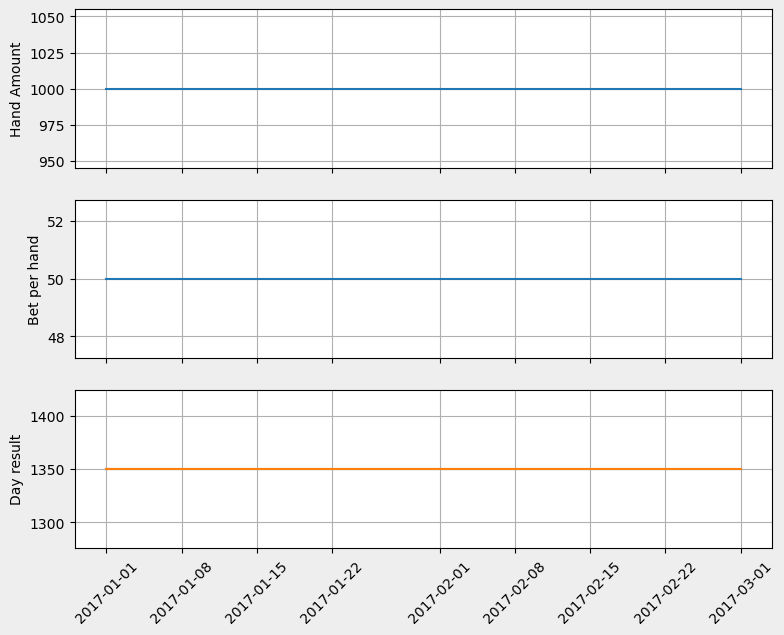

In [117]:
show_gragh(x_date,house_res,hand_period,bet_period)

In [118]:
std_one_hand = 1.4

In [119]:
def count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand) -> float:
    return std_one_hand*(hand_amount_per_day**0.5)*bet_per_hand

In [120]:
std_per_day = count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand)

In [121]:
norm_gen = stats.norm(0,std_per_day)

In [122]:
norm_gen.rvs()

np.float64(2202.90846353274)

In [123]:
house_res_std = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house)+norm_gen.rvs() for _ in x_date])

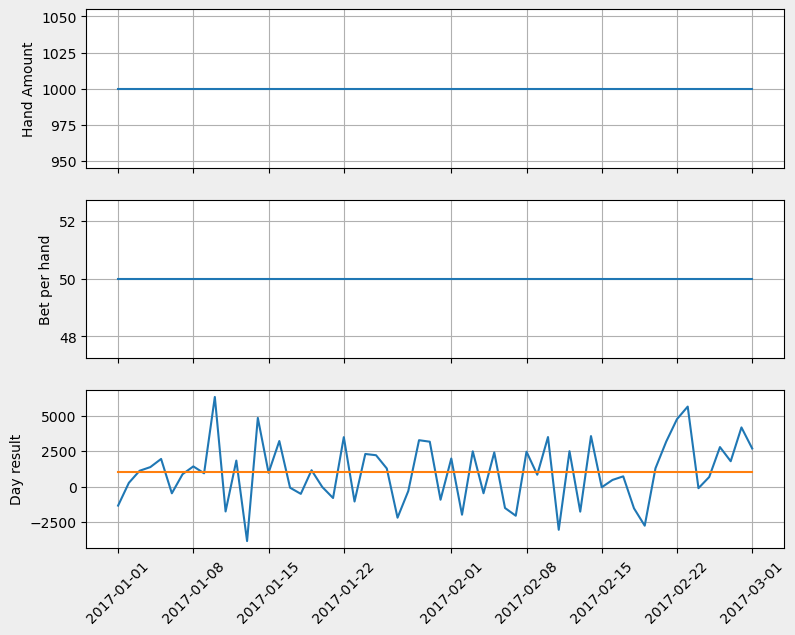

In [124]:
show_gragh(x_date,house_res_std,hand_period,bet_period)

In [115]:
house_res_std.mean()

np.float64(1403.0599417997526)